## Importing Libraries + Data

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [106]:
df = pd.read_csv('depression_stats/Data-Table1.csv') # Reading data
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,Major depressive episode in the past year amon...,NaN,NaN,NaN
2,NaN,Percentage of U.S. youths with a major depress...,NaN,NaN,NaN
3,NaN,NaN,Male,Female,NaN
4,NaN,2004,5,13.10,in %


## Cleaning data

In [107]:
df.drop(labels=['Unnamed: 0', 'Unnamed: 4'], axis=1,
        inplace=True)  # Removing 1st and last columns
df.dropna(inplace=True)  # dropping all rows with NaN
df.rename(columns={"Unnamed: 1": "Year", "Unnamed: 2": "male_episodes",
                   "Unnamed: 3": "female_episodes"}, inplace=True)  # Renaming columns
df = df.astype({'male_episodes': 'float', 'female_episodes': 'float'}) # Converting columns values to type float

In [108]:
df.head()

,Year,male_episodes,female_episodes
4,2004,5.0,13.1
5,2005,4.5,13.3
6,2006,4.2,11.8
7,2007,4.6,11.9
8,2008,4.3,12.5


## Plotting the data

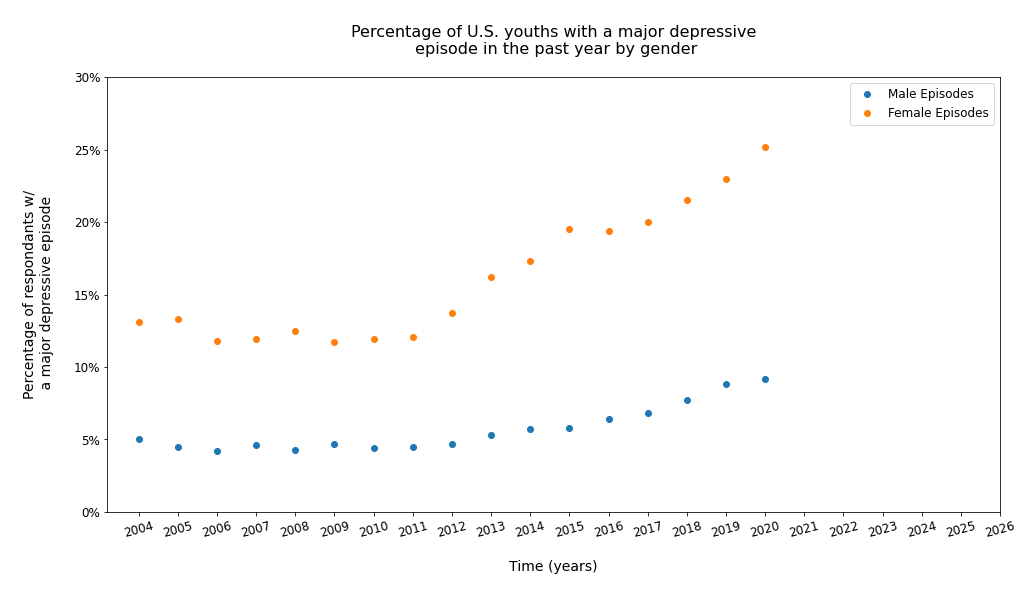

In [109]:
# Define variables
x = df['Year']
y = df['male_episodes']
z = df['female_episodes']
years = []
for i in range(23):
   years.append(2004+i)

# Adjust figure size
plt.figure(figsize=(16, 8))

# Plot male episodes scatter plot 
plt.plot(x, y, 'o', label='Male Episodes')

# Plot female episodes scatter plot on the same graph
plt.plot(x, z, 'o', label='Female Episodes')

# Adjusting x and y axis and title labels
plt.xlabel('\nTime (years)\n', fontsize=14)
plt.ylabel(
    '\nPercentage of respondants w/\n a major depressive episode\n', fontsize=14)
plt.title('\nPercentage of U.S. youths with a major depressive\n episode in the past year by gender\n', fontsize=16)

# Changing spacing/location/values/size of x and y ticks
plt.yticks(ticks=np.arange(0, 35, step=5), labels=[
           f'{i}%' for i in range(0, 35, 5)], fontsize=12)
plt.xticks(ticks=np.arange(0, 23, step=1),
           labels=years, fontsize=12, rotation=15)

# Adding a legend
plt.legend(fontsize=12)

# Saving graph
plt.savefig('depressive_eps_scatterplot.png')

# Showing the graph
plt.show()


## Adding a line of best fit and evalutating it

In [110]:
# Imports
from sympy import S, symbols, printing
from sklearn.metrics import r2_score

Defining equation for line of best fit

In [111]:
def find_best_fit(indep_var, dep_var, sex):
    all_equations = {}
    for i in range(1, 5):
        # Fitting the points to an equation
        fitted_poly = np.polyfit(indep_var, dep_var, deg=i)

        # Creating new x-values and predicting the y values according to our model
        f = np.poly1d(fitted_poly)
        x_new = np.linspace(indep_var[0], indep_var[-1], 50)
        y_new = f(x_new)

        # Getting the polynomial equation is simple terms
        x = symbols("x")
        poly_equation = sum(S("{:6.2f}".format(v))*x**i for i,
                            v in enumerate(fitted_poly[::-1]))
        eq_latex = printing.latex(poly_equation)

        # Finding the expected values for the actual x values + their accuracy
        y = np.polyval(fitted_poly, indep_var)

        r2 = r2_score(dep_var, y)

        all_equations[r2] = [fitted_poly, poly_equation, x_new, y_new, indep_var, dep_var, eq_latex]

    # Finding the best equation
    best_r2 = max(all_equations.keys())
    fitted_poly, poly_equation, x_new, y_new, indep_var, dep_var, eq_latex = all_equations[best_r2]

    # Plotting
    plt.figure()
    plt.plot(x_new, y_new, label="${}$".format(eq_latex)) # Predicted line
    plt.plot(indep_var, dep_var, 'o', label='Depressive Episodes') # Actual points

    # Styling
    plt.legend(fontsize="small", loc='upper left')
    plt.xlabel('\nTime (years)\n', fontsize=14)
    plt.ylabel(
        f'\n{sex.capitalize()} respondents w/ a\n major depressive episode\n', fontsize=14)
    plt.title(f'\nPercentage of U.S. {sex} youths with a major depressive\n episode in the past year\n', fontsize=16)
    plt.show

    return all_equations, fitted_poly, poly_equation, best_r2


Fitting the equations

0.9733337611417647


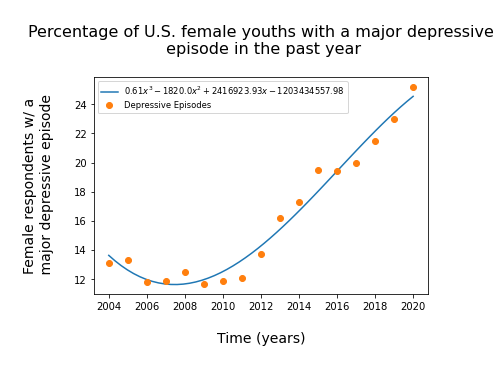

In [112]:
fem_equations, fem_fitted_equation, fem_equation, fem_r2 = find_best_fit(np.array(df['Year'], dtype='int'), np.array(df['female_episodes']), 'female')
print(fem_r2)

0.9858134974538924


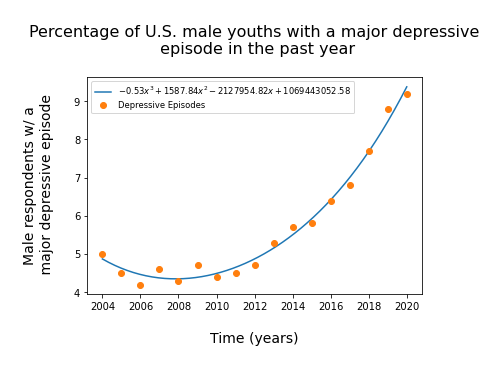

In [113]:
mal_equations, mal_fitted_equation, mal_equation, mal_r2 = find_best_fit(np.array(df['Year'], dtype='int'), np.array(df['male_episodes']), 'male')
print(mal_r2)

Checking out all possible equations + r^2 values

In [114]:
def all_equations_df(equations):
    df = pd.DataFrame({'Equation': [], 'r2 Value': []})

    for key in equations:
        df = df.append(
            {'Equation': equations[key][1], 'r2 Value': key}, ignore_index=True)
    
    return df

# Females
fem_df = all_equations_df(fem_equations)

# Males 
mal_df = all_equations_df(mal_equations)

# Print both
fem_df, mal_df


/var/folders/8s/5kb_fl851lbfqsvhg3z5m8ww0000gn/T/ipykernel_10101/658432678.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
/var/folders/8s/5kb_fl851lbfqsvhg3z5m8ww0000gn/T/ipykernel_10101/658432678.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
/var/folders/8s/5kb_fl851lbfqsvhg3z5m8ww0000gn/T/ipykernel_10101/658432678.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
/var/folders/8s/5kb_fl851lbfqsvhg3z5m8ww0000gn/T/ipykernel_10101/658432678.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
/var/folders/8s/5kb_fl851lbfqsvhg3z5m8ww0000gn/T/ipykernel_10101/6584326

(                                            Equation  r2 Value
 0                                   0.81*x - 1607.78  0.821907
 1                   0.08*x**2 - 302.39*x + 303411.17  0.958008
 2   -0.01*x**3 + 36.0*x**2 - 72575.5*x + 48774233.72  0.973290
 3  0.61*x**3 - 1820.0*x**2 + 2416923.93*x - 12034...  0.973334,
                                             Equation  r2 Value
 0                                    0.27*x - 540.71  0.748415
 1                   0.04*x**2 - 140.61*x + 141185.26  0.984751
 2                -2.87*x**2 + 5708.08*x - 3781309.12  0.985555
 3  -0.53*x**3 + 1587.84*x**2 - 2127954.82*x + 106...  0.985813)

## Synthesizing graphs

In [115]:
def find_vals(fitted_equation, x_vals):
    f = np.poly1d(fitted_equation)
    return f(x_vals)


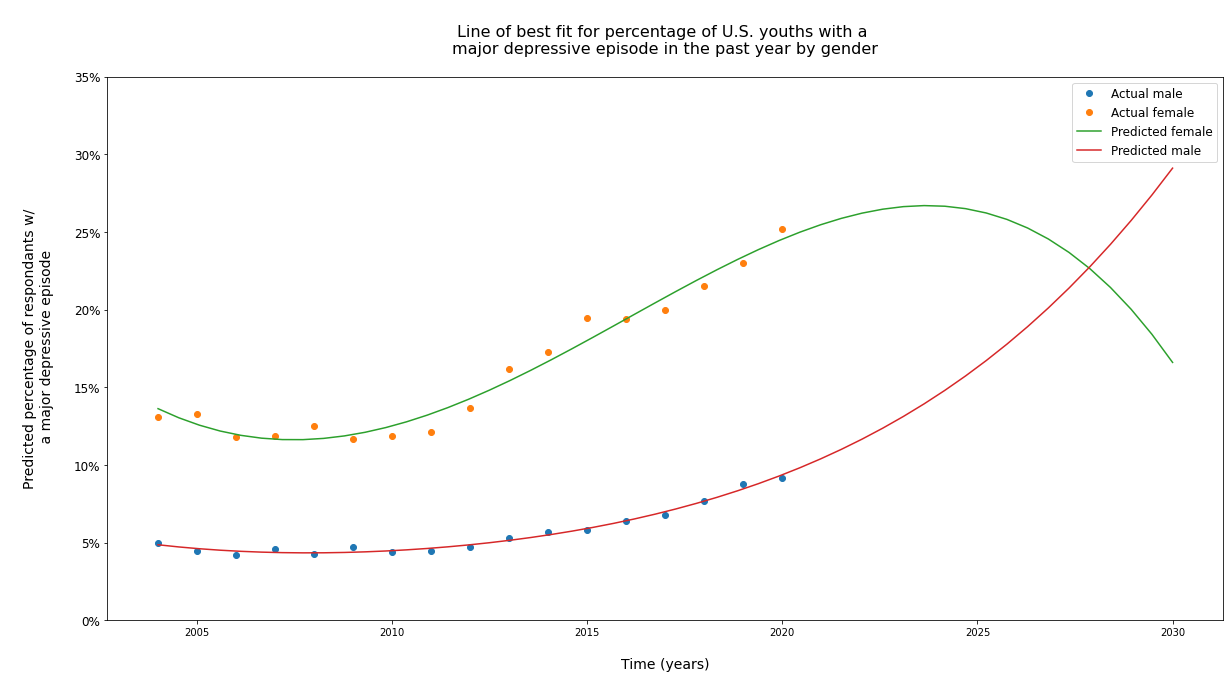

In [116]:
# Define variables
x = np.array(df['Year'], dtype='int')
y = df['male_episodes']
z = df['female_episodes']
x_vals = np.linspace(2004, 2030, 50)
fem_exp_vals = find_vals(fem_fitted_equation, x_vals)
mal_exp_vals = find_vals(mal_fitted_equation, x_vals)

# Adjust figure size
plt.figure(figsize=(20, 10))

# Plot male and female episodes scatter plot
plt.plot(x, y, 'o', label='Actual male')
plt.plot(x, z, 'o', label='Actual female')

# Plot expected episodes
plt.plot(x_vals, fem_exp_vals, '-', label='Predicted female')
plt.plot(x_vals, mal_exp_vals, '-', label='Predicted male')


# Adjusting x and y axis and title labels
plt.xlabel('\nTime (years)\n', fontsize=14)
plt.ylabel(
    '\nPredicted percentage of respondants w/\n a major depressive episode\n', fontsize=14)
plt.title('\nLine of best fit for percentage of U.S. youths with a \nmajor depressive episode in the past year by gender\n', fontsize=16)

# Changing spacing/location/values/size of y ticks
plt.yticks(ticks=np.arange(0, 40, step=5), labels=[
           f'{i}%' for i in range(0, 40, 5)], fontsize=12)

# Adding a legend
plt.legend(fontsize=12)

# Saving graph
plt.savefig('lobf_depressive_eps.png')

# Showing the graph
plt.show()

